In [89]:
# !pip install "python-doctr[tf]"

In [90]:
#  Import dependencies
import warnings
warnings.filterwarnings("ignore")

from doctr.models import ocr_predictor
from doctr.io import DocumentFile
# Environment Setup
import os
os.environ["USE_TF"] = '1'

# Getting Model
model = ocr_predictor(pretrained=True)

## Extract table image & convert into text 

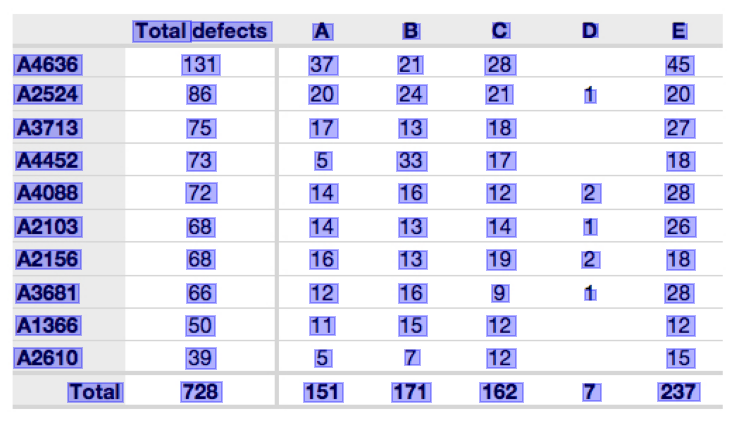

In [91]:
# Getting image
img = DocumentFile.from_images("/content/img3.png")
result = model(img)
result.show(img)

In [92]:
response = result.export()
response

{'pages': [{'page_idx': 0,
   'dimensions': (290, 511),
   'orientation': {'value': None, 'confidence': None},
   'language': {'value': None, 'confidence': None},
   'blocks': [{'geometry': ((0.173828125, 0.033203125),
      (0.3662109375, 0.0830078125)),
     'lines': [{'geometry': ((0.173828125, 0.033203125),
        (0.3662109375, 0.0830078125)),
       'words': [{'value': 'Total',
         'confidence': 0.708664059638977,
         'geometry': ((0.173828125, 0.033203125),
          (0.2548828125, 0.0830078125))},
        {'value': 'defects',
         'confidence': 0.9953203201293945,
         'geometry': ((0.25390625, 0.0341796875),
          (0.3662109375, 0.0810546875))}]}],
     'artefacts': []},
    {'geometry': ((0.423828125, 0.0390625), (0.4521484375, 0.0791015625)),
     'lines': [{'geometry': ((0.423828125, 0.0390625),
        (0.4521484375, 0.0791015625)),
       'words': [{'value': 'A',
         'confidence': 0.9999780654907227,
         'geometry': ((0.423828125, 0.039062

## Original document from its predictions

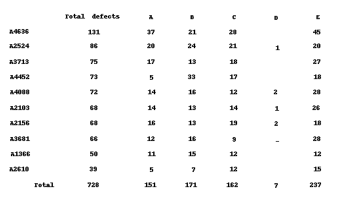

In [93]:
import matplotlib.pyplot as plt
synthetic_pages = result.synthesize()
plt.imshow(synthetic_pages[0])
plt.axis('off')
plt.show()

## Convert Json format

In [94]:
import json 
json_object = json.dumps(response, indent = 4) 
print(json_object)

{
    "pages": [
        {
            "page_idx": 0,
            "dimensions": [
                290,
                511
            ],
            "orientation": {
                "value": null,
                "confidence": null
            },
            "language": {
                "value": null,
                "confidence": null
            },
            "blocks": [
                {
                    "geometry": [
                        [
                            0.173828125,
                            0.033203125
                        ],
                        [
                            0.3662109375,
                            0.0830078125
                        ]
                    ],
                    "lines": [
                        {
                            "geometry": [
                                [
                                    0.173828125,
                                    0.033203125
                                ],
            

## Show all text

In [95]:
# response['pages'][0]['blocks'][0]['lines'][0]['words']
for block in response['pages'][0]['blocks']:
  for line in block['lines']:
    # print(len(line['words']))
    if len(line['words'])>1:
      text = ''
      for word in line['words']:
        text = str(text)+ " " + str(word['value'])
      print(text)
        
    else:
      text = line['words'][0]['value']
      print(text)

 Total defects
A
B
C
D
E
A4636
131
37
21
28
45
A2524
86
20
24
21
1
20
A3713
75
17
13
18
27
A4452
73
5
33
17
18
A4088
72
14
16
12
2
28
A2103
68
14
13
14
1
26
A2156
68
16
13
19
2
18
A3681
66
12
16
9
-
28
A1366
50
11
15
12
12
A2610
39
5
7
12
15
Total
728
151
171
162
7
237
